In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import sys, itertools

# 指定支持中文的字体，例如SimHei或者Microsoft YaHei
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
# 读取Excel文件
df = pd.read_excel('A1.xlsx', usecols=['销量（箱）', '金额（元）'])
# 去掉无数值的行
df.dropna(inplace=True)
# 将数据转换为NumPy数组
data_array = df.values
index = pd.date_range(start='2011-01', periods=data_array.shape[0], freq='M')
df = pd.DataFrame(data_array, index=index, columns=['销量', '金额'])

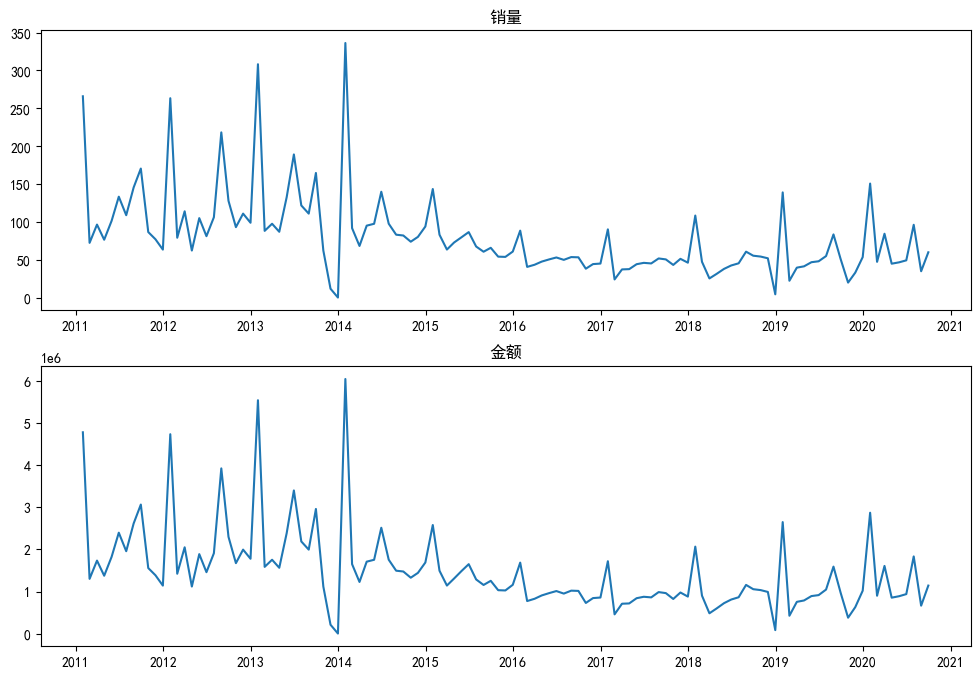

In [3]:
# 画出销量和金额的时间序列图
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(df['销量'])
plt.title('销量')
plt.subplot(212)
plt.plot(df['金额'])
plt.title('金额')
plt.show()

In [4]:
series = df.loc['2014-02':, '销量']
data = series.values

# 创建 MinMaxScaler 的实例
scaler = MinMaxScaler()
# 使用 fit_transform 方法来拟合数据并转换它
normalized_data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

normalized_series = pd.Series(normalized_data, index=series.index)

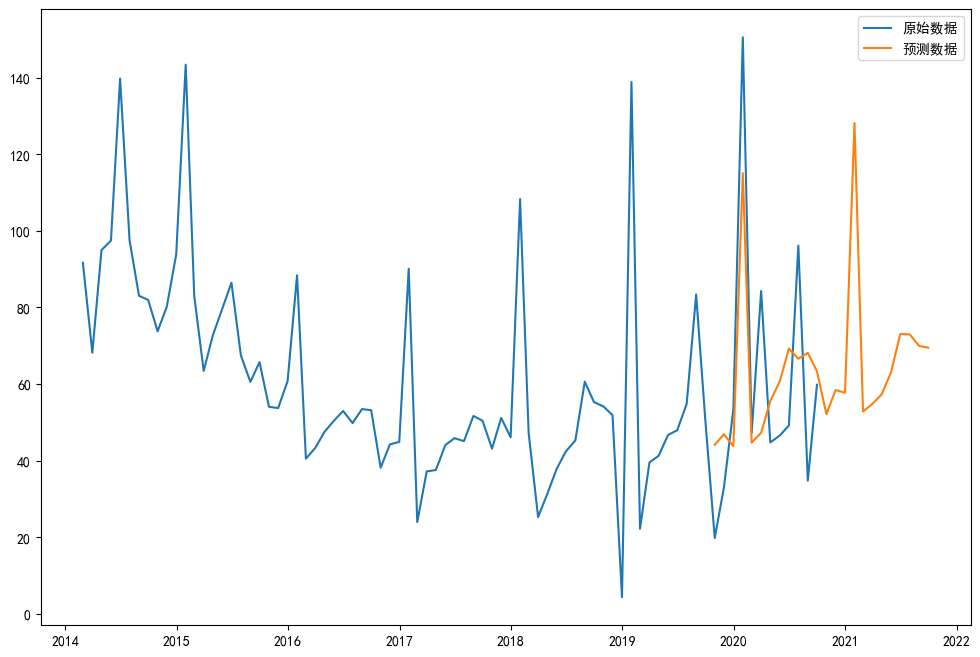

In [5]:
# 创建并拟合模型
model = ExponentialSmoothing(normalized_series, seasonal_periods=12)

# 使用 fit 方法来拟合模型
model_fit = model.fit()

# 使用 predict 方法来预测最后12个和未来12个月的销量
forecast_start = series.index[-12]
forecast_end = forecast_start + pd.DateOffset(months=23)
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# 将预测的值转换为原始的数据范围
forecast = scaler.inverse_transform(forecast.values.reshape(-1, 1)).reshape(-1)

# 创建一个新的时间索引
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='M')
forecast = pd.Series(forecast, index=forecast_index)

# 画出原始数据和预测数据
plt.figure(figsize=(12, 8))
plt.plot(series, label='原始数据')
plt.plot(forecast, label='预测数据')
plt.legend()
plt.show()